In [1]:
import os
os.chdir('..')
import numpy as np
from notebooks import config
import matplotlib.pyplot as plt
from utils.lay_stack import lay_stack
from utils.geotif_io import readTiff,  writeTiff
from utils.imgShow import imgShow


zsh:1: no such file or directory: /Users/luo/miniconda3/envs/venv/bin:/Users/luo/miniconda3/envs/mmaster_venv:~/src-demcoreg-dshean/pygeotools/pygeotools:~/src-demcoreg-dshean/demcoreg/demcoreg:~/src-demcoreg-dshean/imview/imview:/Users/luo/miniconda3/envs/venv/bin:/Users/luo/miniconda3/condabin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/Library/Frameworks/Python.framework/Versions/3.8/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/luo/OneDrive/GitHub/dem-aster/nasa_asp/StereoPipeline-3.0.1-alpha-2022-03-10-x86_64-OSX/bin


In [5]:
import sys
sys.path.append("/Users/luo/Applications/StereoPipeline-3.0.1-alpha-2022-03-10-x86_64-OSX/bin")


zsh:1: command not found: aster2asp


In [3]:
dir_img = config.root_proj+'/data/aster_data/wkunlun-2020/aster_reproj/VNIR_2020.20322597'
# path_band1 = dir_img + '/VNIR-Band1_proj.tif'
# path_band2 = dir_img + '/VNIR-Band2_proj.tif'
# path_band3 = dir_img + '/VNIR-Band3N_proj.tif'
# path_band1 = config.root_proj+'/data/dem_data/srtm-c/SRTMGL3_wkunlun.tif'
# path_band2 = config.root_proj+'/data/dem_data/srtm-x/srtm_x.tif'



In [3]:
img_band1, b1_info = readTiff(path_band1)
img_band2, b2_info = readTiff(path_band2)
# img_band3, _ = readTiff(path_band3)
# img_band1[img_band1 == -32768] = 0
# img_band2[img_band2 == -32768] = 0
# img_band3[img_band3 == -32768] = 0


In [4]:
print(b1_info)
print(b2_info)


{'geoextent': (80.117083333, 81.939583333, 34.907916667, 35.852916667), 'geotrans': (80.117083333, 0.0008333333333333357, 0.0, 35.852916667, 0.0, -0.0008333333333333336), 'geosrs': '4326', 'row': 1134, 'col': 2187, 'bands': 1}
{'geoextent': (80.11763888888889, 81.94041666666666, 34.90763888888888, 35.85236111111111), 'geotrans': (80.11763888888889, 0.0002777777777777778, 0.0, 35.85236111111111, 0.0, -0.0002777777777777778), 'geosrs': '4326', 'row': 3401, 'col': 6562, 'bands': 1}


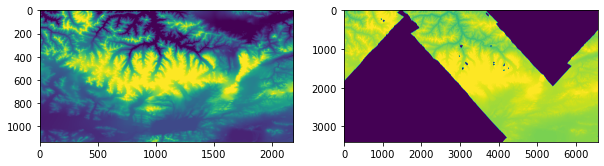

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
imgShow(img_band1, clip_percent=5)
plt.subplot(1,2,2)
imgShow(img_band2, clip_percent=5)


In [6]:
print(img_band1.shape)
print(img_band2.shape)
# print(img_band3.shape)


(1134, 2187)
(3401, 6562)


In [7]:
path_bands = [path_band1, path_band2]
path_bands

['/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem_data/srtm-c/SRTMGL3_wkunlun.tif',
 '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem_data/srtm-x/srtm_x.tif']

In [4]:
path_band1 = dir_img + '/VNIR-Band1_proj.tif'
path_band2 = dir_img + '/VNIR-Band2_proj.tif'
path_band3 = dir_img + '/VNIR-Band3N_proj.tif'

# path_band1 = config.root_proj+'/data/dem_data/srtm-c/SRTMGL3_wkunlun.tif'
# path_band2 = config.root_proj+'/data/dem_data/srtm-x/srtm_x.tif'

path_imgs = [path_band1, path_band2, path_band3]
path_out = dir_img+'/layer_stack.tif'


In [5]:
lay_stack(path_imgs, path_out)


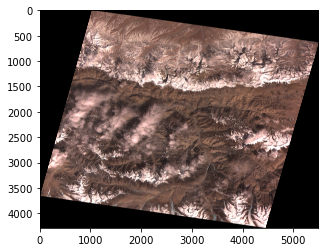

In [6]:
img_tmp, tmp_info = readTiff(path_out)
img_tmp[img_tmp<-1000] = 0
imgShow(img_tmp, color_bands=[2,1,0])



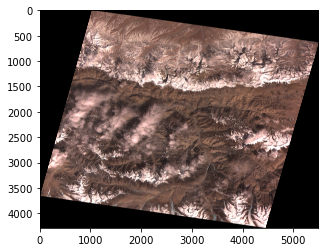

2

In [ ]:
# def lay_stack(inp_bands, im_geotrans, im_geosrs, path_out):
#   '''
#   input:
#     inp_bands: list, contains the bands/imgs to be stacked. the bands/imgs is np.array()
#     im_geotrans and im_geosrs are obtained by using readTiff.
#     im_geosrs is espg code.

#   '''



In [9]:
# ###  .tiff image write
# def writeTiff(im_data, im_geotrans, im_geosrs, path_out):
#     '''
#     input:
#         im_data: tow dimentions (order: row, col),or three dimentions (order: row, col, band)
#         im_geosrs: espg code correspond to image spatial reference system.
#     '''
#     if 'int8' in im_data.dtype.name:
#         datatype = gdal.GDT_Byte
#     elif 'int16' in im_data.dtype.name:
#         datatype = gdal.GDT_UInt16
#     else:
#         datatype = gdal.GDT_Float32
#     if len(im_data.shape) == 3:
#         im_data = np.transpose(im_data, (2, 0, 1))
#         im_bands, im_height, im_width = im_data.shape
#     else:
#         im_bands,(im_height, im_width) = 1,im_data.shape
#     driver = gdal.GetDriverByName("GTiff")
#     dataset = driver.Create(path_out, im_width, im_height, im_bands, datatype)
#     if(dataset!= None):
#         dataset.SetGeoTransform(im_geotrans)       # 
#         dataset.SetProjection("EPSG:" + str(im_geosrs))      # 
#     if im_bands > 1:
#         for i in range(im_bands):
#             dataset.GetRasterBand(i+1).WriteArray(im_data[i])
#         del dataset
#     else:
#         dataset.GetRasterBand(1).WriteArray(im_data)
#         del dataset
